In [165]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import SGDClassifier

pd.set_option('display.max_columns',None)

# Reading and Cleaning the Data

In [115]:
forest_cover_type = pd.read_csv('/Users/taddbackus/School/spring23/ML1/Lab1/covtype.csv')
forest_cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


### Renaming Wilderness Area

In [116]:
forest_cover_type.rename(columns={'Wilderness_Area1':'Rawah','Wilderness_Area2':'Neota','Wilderness_Area3':'Comanche Peak','Wilderness_Area4':'Cache la Poudre'},inplace=True)
forest_cover_type.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche Peak,Cache la Poudre,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


### New dataframe that only contains two most common cover types
1 -> Spruce/Fir   
2 -> Lodgepole Pine

In [117]:
forestDF = forest_cover_type[(forest_cover_type['Cover_Type']==1) | (forest_cover_type['Cover_Type']==2)]

### Renaming to cover type names and verifying that they are close to being balanced

In [118]:
forestDF = forestDF.astype({'Cover_Type':'string'})
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('1','Spruce/Fir')
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('2','Lodgepole Pine')
forestDF['Cover_Type'].describe().transpose()
forestDF.groupby('Cover_Type').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche Peak,Cache la Poudre,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
Cover_Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Lodgepole Pine,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301,283301
Spruce/Fir,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840,211840


### Recoding Cover Type to 0 and 1
Lodgepole Pine -> 1   
Spruce/Fir -> 0

In [119]:
forestDF['treeType'] = forestDF.Cover_Type == 'Lodgepole Pine'
forestDF.treeType = forestDF.treeType.astype(np.int64)
if 'Cover_Type' in forestDF:
    del forestDF['Cover_Type']

In [120]:
forestFullDF = forestDF.copy()

# Creating Models

### Splitting the Data between Response and Predictors

In [121]:
if 'treeType' in forestDF:
    Y = forestDF['treeType'].values
    del forestDF['treeType']
    X = forestDF.values

## Logistic Regression

### Creating Cross Validation Object - Logistic Regression

In [122]:
num_cv_iter = 3
num_instances = len(Y)
cv_Log = ShuffleSplit(n_splits=num_cv_iter,test_size=0.2)

### Creating Logistic Regression Object

In [123]:
# Classes are pretty well balanced, don't need a weight
# I tried playing with the C value and it didn't seem to change accuracy much
lr_clf = LogisticRegression(penalty='l2',
                            C=1.0,
                            class_weight=None)

In [124]:
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_Log.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))

/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.7510123297215967
Confusion Matrix 
 [[28997 13428]
 [11229 45375]]


/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.7573236122751921
Confusion Matrix 
 [[29190 13195]
 [10837 45807]]
****Iteration 2 ****
Accuracy 0.7534257641700915
Confusion Matrix 
 [[29148 13149]
 [11269 45463]]


/Users/taddbackus/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Weight', ylabel='Var'>

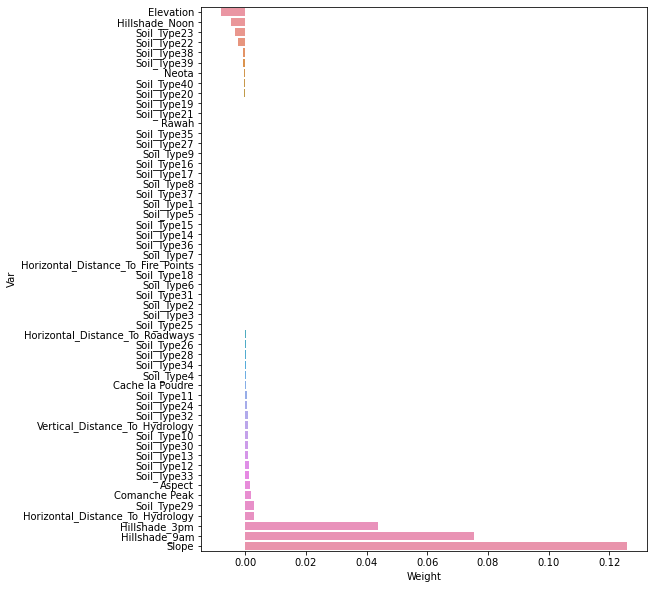

In [125]:
logWeights = pd.Series(lr_clf.coef_[0],index=forestDF.columns)
logWeights = pd.DataFrame({'Var':logWeights.index,'Weight':logWeights.values})
logWeights = logWeights.sort_values('Weight')
plt.figure(figsize=(8,10))
sns.barplot(x='Weight',y='Var',data=logWeights)

## Logistic Regression with Scaled Predictors

### Scaling Data

In [126]:
sclObj = StandardScaler()
sclObj.fit(X[train_indices])

X_trainScaled = sclObj.transform(X[train_indices])
X_testScaled = sclObj.transform(X[test_indices])

In [127]:
lrs_clf = LogisticRegression(penalty='l2',
                            C=1.0,
                            class_weight=None)

In [128]:
lrs_clf.fit(X_trainScaled,Y[train_indices])
y_hatS = lrs_clf.predict(X_testScaled)
print('Accuracy',mt.accuracy_score(Y[test_indices],y_hatS))
print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hatS))


Accuracy 0.7758838320088055
Confusion Matrix 
 [[30272 12025]
 [10169 46563]]


<AxesSubplot:xlabel='Weight', ylabel='Var'>

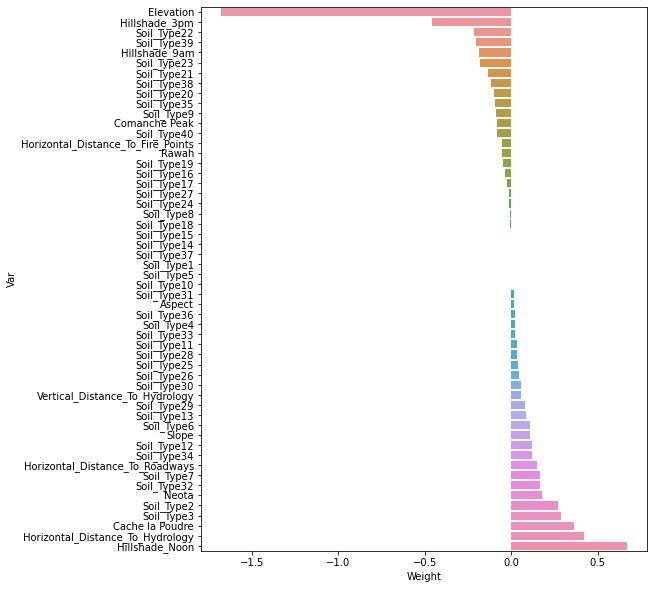

In [129]:
logSWeights = pd.Series(lrs_clf.coef_[0],index=forestDF.columns)
logSWeights = pd.DataFrame({'Var':logSWeights.index,'Weight':logSWeights.values})
logSWeights = logSWeights.sort_values('Weight')
plt.figure(figsize=(8,10))
sns.barplot(x='Weight',y='Var',data=logSWeights)

## SVM

### Creating Cross Validation Object - SVM

In [130]:
cv_CGD = StratifiedShuffleSplit(n_splits=3,test_size=0.2)

### Creating SVM using linear SGD due to large amount of data

In [131]:
regularize_const = 0.1
iterations = 10

svm_sgd = SGDClassifier(alpha=regularize_const,
                       fit_intercept=True,
                       l1_ratio=0.0,
                       learning_rate='optimal',
                       loss='hinge',
                       max_iter=iterations,
                       n_jobs=-1,
                       penalty='l2')

In [132]:
scl = StandardScaler()

for train_idx, test_idx in cv_CGD.split(X,Y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),Y[train_idx])
    y_hatSVM = svm_sgd.predict(scl.transform(X[test_idx]))
    
    print('Accuracy',mt.accuracy_score(Y[test_idx],y_hatSVM))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_idx],y_hatSVM))


Accuracy 0.7659473487564249
Confusion Matrix 
 [[27738 14630]
 [ 8548 48113]]
Accuracy 0.764473033151905
Confusion Matrix 
 [[27888 14480]
 [ 8844 47817]]
Accuracy 0.7671490169546294
Confusion Matrix 
 [[27886 14482]
 [ 8577 48084]]


<AxesSubplot:xlabel='Weight', ylabel='Var'>

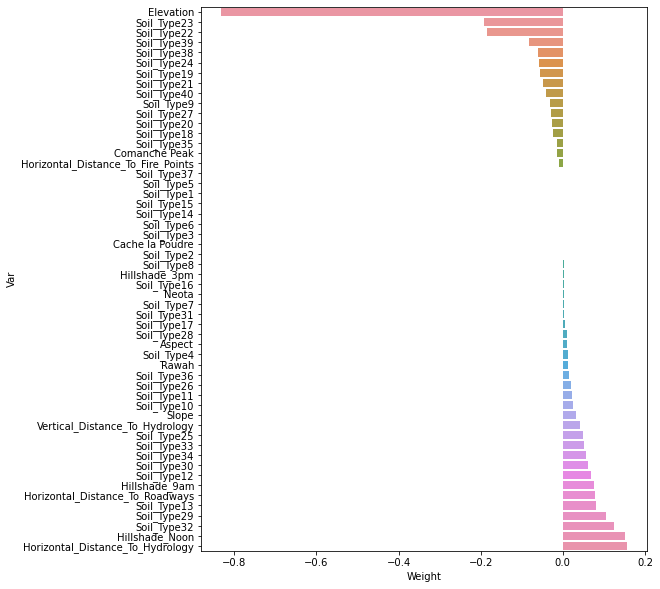

In [133]:
SVMWeights = pd.Series(svm_sgd.coef_[0],index=forestDF.columns)
SVMWeights = pd.DataFrame({'Var':SVMWeights.index,'Weight':SVMWeights.values})
SVMWeights = SVMWeights.sort_values('Weight')
plt.figure(figsize=(8,10))
sns.barplot(x='Weight',y='Var',data=SVMWeights)

### Creating SVM using logistic SGD due to large amount of data

In [134]:
log_sgd = SGDClassifier(alpha=regularize_const,
                       fit_intercept=True,
                       l1_ratio=0.0,
                       learning_rate='optimal',
                       loss='log',
                       max_iter=iterations,
                       n_jobs=-1,
                       penalty='l2')

In [135]:
scl = StandardScaler()

for train_idx, test_idx in cv_CGD.split(X,Y):
    log_sgd.fit(scl.fit_transform(X[train_idx]),Y[train_idx])
    y_hatSVM = log_sgd.predict(scl.transform(X[test_idx]))
    
    print('Accuracy',mt.accuracy_score(Y[test_idx],y_hatSVM))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_idx],y_hatSVM))

Accuracy 0.76427107211019
Confusion Matrix 
 [[27482 14886]
 [ 8458 48203]]
Accuracy 0.7629886194952994
Confusion Matrix 
 [[27420 14948]
 [ 8523 48138]]
Accuracy 0.7661392117460541
Confusion Matrix 
 [[27671 14697]
 [ 8462 48199]]


<AxesSubplot:xlabel='Weight', ylabel='Var'>

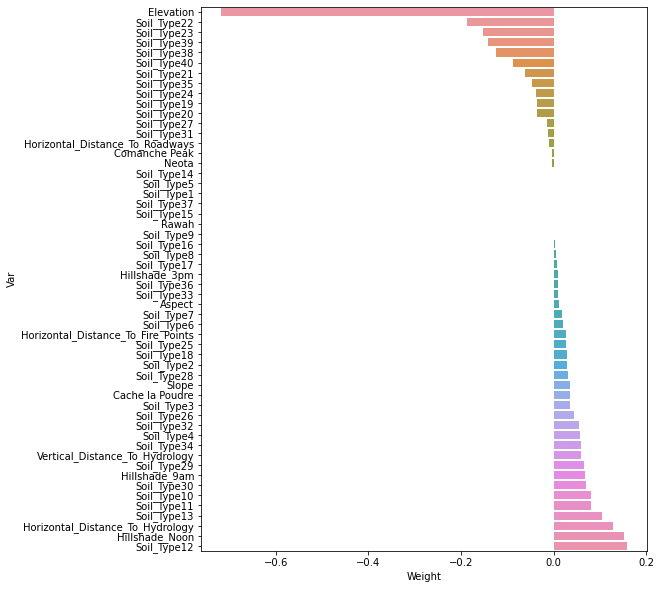

In [136]:
logSVMWeights = pd.Series(log_sgd.coef_[0],index=forestDF.columns)
logSVMWeights = pd.DataFrame({'Var':logSVMWeights.index,'Weight':logSVMWeights.values})
logSVMWeights = logSVMWeights.sort_values('Weight')
plt.figure(figsize=(8,10))
sns.barplot(x='Weight',y='Var',data=logSVMWeights)

## SVM with sub-sampled data - support vectors

### Sub-sampling data and verifying still balanced

In [144]:
forestSubDF = forestFullDF.sample(10000)
forestSubDF.head()
#forestSubDF['treeType'].describe().transpose()
forestSubDF.groupby('treeType').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche Peak,Cache la Poudre,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
treeType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193,4193
1,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807,5807


### Creating and Running SVM model on smaller dataframe

In [145]:
if 'treeType' in forestSubDF:
    ySub = forestSubDF['treeType'].values
    del forestSubDF['treeType']
    xSub = forestSubDF.values

In [150]:
for train_indices, test_indices in cv_Log.split(xSub,ySub):
    X_train = xSub[train_indices]
    Y_train = ySub[train_indices]
    X_test = xSub[test_indices]
    Y_test = ySub[test_indices]
X_train_scaled = sclObj.transform(X_train)
X_test_scaled = sclObj.transform(X_test)

In [151]:
svm_clf = SVC(C=0.5,
             kernel='rbf',
             degree=3,
             gamma='auto')

Results:

In [152]:
svm_clf.fit(X_train_scaled,Y_train)
y_hatSVM = svm_clf.predict(X_test_scaled)
print('Accuracy',mt.accuracy_score(Y_test,y_hatSVM))
print('Confusion Matrix \n',mt.confusion_matrix(Y_test,y_hatSVM))

Accuracy 0.7905
Confusion Matrix 
 [[602 237]
 [182 979]]


Support Vector shape:

In [155]:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_)

(4411, 54)
(4411,)
[2186 2225]


### Formatting data for plotting

In [166]:
forestTested = forestSubDF.iloc[train_indices]
forestSupport = forestTested.iloc[svm_clf.support_,:]
forestSupport['treeType'] = Y[svm_clf.support_]
forestSubDF['treeType'] = Y

/var/folders/b6/xllr9jf92s55608_ychrqz700000gn/T/ipykernel_11561/3635881662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forestSupport['treeType'] = Y[svm_clf.support_]


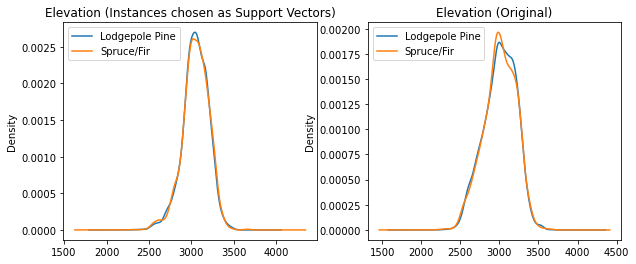

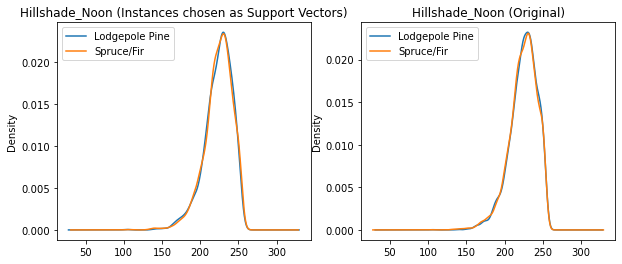

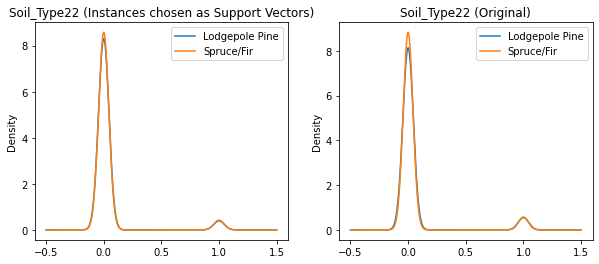

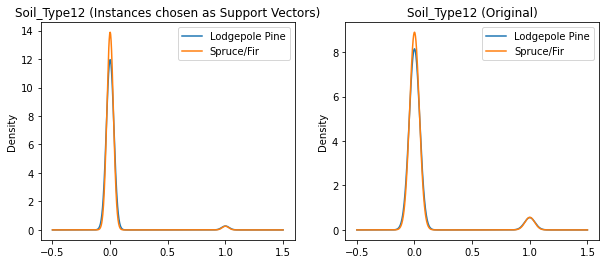

In [167]:

forestGroupSupport = forestSupport.groupby(['treeType'])
forestGroup = forestSubDF.groupby(['treeType'])

vars_to_plot = ['Elevation','Hillshade_Noon','Soil_Type22','Soil_Type12']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    ax = forestGroupSupport[v].plot.kde()
    plt.legend(['Lodgepole Pine','Spruce/Fir'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    plt.subplot(1,2,2)
    ax = forestGroup[v].plot.kde()
    plt.legend(['Lodgepole Pine','Spruce/Fir'])
    plt.title(v+' (Original)')